In [366]:
import pandas as pd 
data=pd.read_csv(r"C:\Users\Kartik\OneDrive\Desktop\Jupyter Notebook\Machine Learning\projects\Sentiment Analysis\tweets.csv")

In [367]:
# viewing top 5 row and columns of data 
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [369]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [370]:
# there is no role of id in predicting tweets
data.drop(['id'],axis=1,inplace=True)

In [371]:
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...


In [372]:
len(data)

7920

In [373]:
data['label'].value_counts(normalize=True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

<Axes: xlabel='label'>

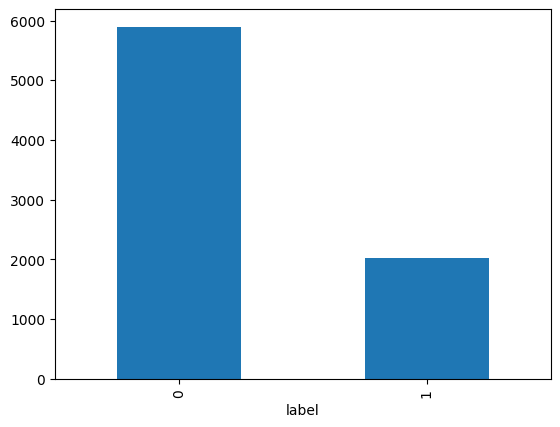

In [374]:
data['label'].value_counts().plot(kind="bar")

In [375]:
import re  # importing regular expressions 

In [376]:
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [377]:
# substitue 's with is
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [378]:
# We'll retains only alphabets and numbers 
re.sub("@[A-Za-z0-9]", "", data["tweet"][11])

'Ha! Not heavy machinery but it does what I need it to. pple really dropped the ball with that design. #drinkyourhaterade'

In [379]:
# removing "#"

In [380]:
re.sub("#","",data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [381]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kartik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [382]:
from nltk.corpus import stopwords
# Get the list of stopwords for a specific language (e.g., English)
stop_words_nltk = set(stopwords.words('english'))
print(stop_words_nltk)
print()
print(f"length of stop words using nltk lib is:{len(stop_words_nltk)}")

{"mustn't", "he'd", 'y', 'few', "hasn't", 'won', "i'd", 'at', 'him', 'other', 'why', 'such', 'we', 'have', 'into', 'a', 'than', 'about', 'their', 'over', 'wasn', 'i', 'ma', 'own', 'through', "you'll", "aren't", 'shouldn', 'does', 'all', 'do', 'here', 'his', 'myself', 'by', 'hers', 'that', 'where', "you've", 'weren', 'wouldn', 'under', 'more', "you'd", 'mightn', 'while', 'aren', 'them', 'they', 'some', 'out', 'above', 'couldn', 'ours', 'down', 'once', 'ourselves', 'to', 'same', 'd', 'been', 'until', 'will', 'again', 'you', 'as', 'who', 'yourselves', "that'll", "she's", 'further', 'haven', "we've", 'ain', "should've", "they'll", 'against', "mightn't", 'nor', 'up', "it'd", 'be', 'hadn', 'below', 'my', 'didn', 'had', 'me', "we'd", 'its', 'our', 'just', "we'll", "he's", 'most', 'those', 've', 'was', 'after', 'whom', 'themselves', 'hasn', 'too', 'am', 'between', 'are', "they'd", "hadn't", 'with', 'both', 'only', 're', 'yours', 'because', 'off', 'very', "wouldn't", "he'll", "didn't", "they've

In [383]:
# removing sstopwords using sklearn 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words_sklearn=list(ENGLISH_STOP_WORDS)
print(stop_words_sklearn)
print()
print(f"length of stop words using sklearn lib is:{len(stop_words_sklearn)}")

['become', 'top', 'why', 'first', 'beyond', 'becomes', 'already', 'do', 'except', 'his', 'many', 'somehow', 'sometime', 'by', 'get', 'eight', 'take', 'call', 'put', 'some', 'find', 'ourselves', 'show', 'to', 'sixty', 'been', 'until', 'third', 'well', 'former', 'as', 'yourselves', 'across', 'further', 'mostly', 'nor', 'whereupon', 'three', 'be', 'below', 'my', 'our', 'too', 'eleven', 'are', 'beforehand', 'yet', 're', 'yours', 'because', 'done', 'is', 'might', 'others', 'since', 'would', 'in', 'serious', 'thereby', 'your', 'of', 'from', 'himself', 'each', 'became', 'thin', 'keep', 'during', 'how', 'full', 'now', 'he', 'forty', 'someone', 'on', 'her', 'them', 'per', 'will', 'few', 'alone', 'cant', 'at', 'him', 'we', 'have', 'a', 'one', 'about', 'rather', 'etc', 'through', 'all', 'here', 'besides', 'hers', 'mill', 'while', 'side', 'anyway', 'whence', 'hereafter', 'above', 'give', 'always', 'everywhere', 'mine', 'whether', 'back', 'toward', 'up', 'hereby', 'had', 'most', 'move', 'those', 'l

In [384]:
# Combine both sets of stop words
combined_stopwords = stop_words_nltk.union(stop_words_sklearn)
len(combined_stopwords)

397

In [385]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [386]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kartik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [387]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [388]:
lemmatized_word= lemmatizer.lemmatize(data['tweet'][63], pos='v')  # 'v' is for verb; use appropriate POS tag
print(lemmatized_word.lower()) 

gain followers rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si


In [389]:
import contractions

In [390]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [391]:
contracted=contractions.fix(data['tweet'][24])
contracted

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [392]:
import re

In [393]:
def tweet_cleaner_without_stopwords(text):
    new_text=re.sub(r"'s\b'"," is",text)
    new_text=re.sub("@[A-Za-z0-9]", "",new_text)
    new_text=re.sub("#","",new_text)
    new_text=re.sub(r"http\S+", "", new_text)
    new_text=contractions.fix(new_text)
    # Convert to lowercase and split into tokens
    new_text = new_text.lower().strip()
  

    cleaned_text=""
    for tokens in new_text.split():
        cleaned_text=cleaned_text+lemmatizer.lemmatize(tokens)+" "

    return cleaned_text

In [394]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [395]:
cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case ^^ thanks to my uncle :) yay sony xperia s sonyexperias… ',
 'we love this! would you go? talk makememories unplug relax iphone smartphone wifi connect... ',
 'i am wired i know i am george i wa made that way ;) iphone cute daventry home ',
 'what amazing service! apple will not even talk to me about a question i have unless i pay them $19.95 for their stupid support! ']

In [396]:
data["tweet_cleaner_without_stopwords"]=cleaned_tweets

In [397]:
 print(f"Normal tweets                :{data["tweet"][5]}")
print()
print(f"tweet_cleaner_with_stopwords :{data["tweet_cleaner_without_stopwords"][5]}")

Normal tweets                :iPhone software update fucked up my phone big time Stupid iPhones

tweet_cleaner_with_stopwords :iphone software update fucked up my phone big time stupid iphones 


In [398]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
   
    new_text = new_text.lower().strip()
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    
    
    cleaned_text = ''
    for tokens in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(tokens) + ' '
    
    return cleaned_text

In [399]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [400]:
data.columns

Index(['label', 'tweet', 'tweet_cleaner_without_stopwords'], dtype='object')

In [401]:
data["tweet_cleaner_with_stopwords"]=cleaned_tweets

In [402]:
data.head()

,label,tweet,tweet_cleaner_without_stopwords,tweet_cleaner_with_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...,finally transparant silicon case thanks uncle ...
2,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? talk makememories ...,love talk makememories unplug relax iphone sma...
3,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to...,what amazing service! apple will not even talk...,amazing service apple talk question unless pay...


In [403]:
 domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
 final_stopwords = domain_stopwords + list(combined_stopwords)
 type(final_stopwords)

list

In [404]:

def tweet_cleaner_with_final_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)  # Expanding contractions
    new_text = re.sub("#", "", new_text)  # Removing hashtags
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)  # Removing mentions
    new_text = re.sub(r"http\S+", "", new_text)  # Removing URLs
    new_text = contractions.fix(new_text)  # Expanding other contractions
    
    # Keep negations by modifying stopword removal
    negations = {"not", "no", "never", "don't", "isn't", "wasn't", "aren't", "weren't", "won't", "can't", "shouldn't"}
    new_text_tokens = new_text.lower().strip().split()
    filtered_tokens = [token for token in new_text_tokens if token not in final_stopwords or token in negations]
    
    # Retain punctuation that affects sentiment (e.g., "!!" or "?")
    cleaned_text = " ".join(filtered_tokens)
    
    # Lemmatization
    cleaned_text = " ".join([lemmatizer.lemmatize(token) for token in cleaned_text.split()])
    
    return cleaned_text


In [405]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_final_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone', 'finally transparant silicon case ^^ thanks uncle :) yay sony xperia sonyexperias…', 'love this! go? talk makememories unplug relax iphone smartphone wifi connect...', 'wired know george way ;) iphone cute daventry home', 'amazing service! apple not talk question unless pay $19.95 stupid support!', 'iphone software update fucked big time stupid iphones', 'happy .. instapic instadaily sony xperia xperiaz', 'new type c charger cable uk … bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre 2018 newyear starting 2018 recipe technology samsunggalaxys9 iphonex pic.twitter.com/pjiwq59wtc', 'bout shopping listening music iphone justme music likeforlike followforfollow…', 'photo: fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor...']


In [406]:
data["tweet_cleaner_with_final_stopwords"]=cleaned_tweets

In [407]:
data.head()

,label,tweet,tweet_cleaner_without_stopwords,tweet_cleaner_with_stopwords,tweet_cleaner_with_final_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...,finally transparant silicon case thanks uncle ...,finally transparant silicon case ^^ thanks unc...
2,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? talk makememories ...,love talk makememories unplug relax iphone sma...,love this! go? talk makememories unplug relax ...
3,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home,wired know george way ;) iphone cute daventry ...
4,1,What amazing service! Apple won't even talk to...,what amazing service! apple will not even talk...,amazing service apple talk question unless pay...,amazing service! apple not talk question unles...


In [408]:
import matplotlib.pyplot as plt

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', '^^', 'thanks', 'uncle', ':)', 'yay', 'sony', 'xperia', 'sonyexperias…', 'love', 'this!', 'go?', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect...', 'wired', 'know', 'george', 'way', ';)', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service!', 'apple', 'not', 'talk', 'question']


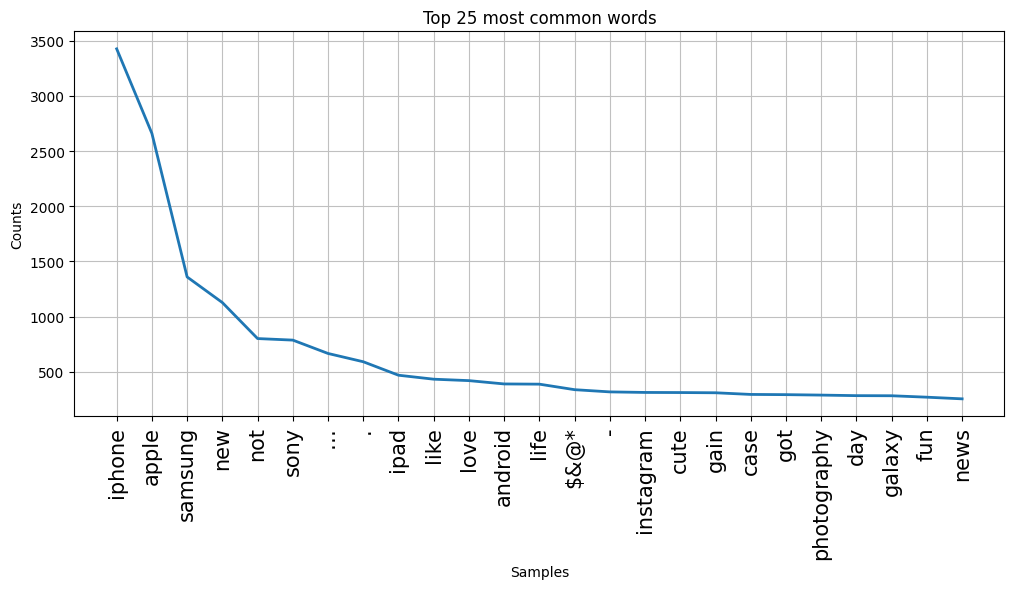

In [409]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['tweet_cleaner_with_final_stopwords']:
    all_words.extend(t.split())

print(all_words[:50])

# plotting frequency distribution without stopwords
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', '^^', 'thanks', 'uncle', ':)', 'yay', 'sony', 'xperia', 'sonyexperias…', 'love', 'this!', 'go?', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect...', 'wired', 'know', 'george', 'way', ';)', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service!', 'apple', 'not', 'talk', 'question']


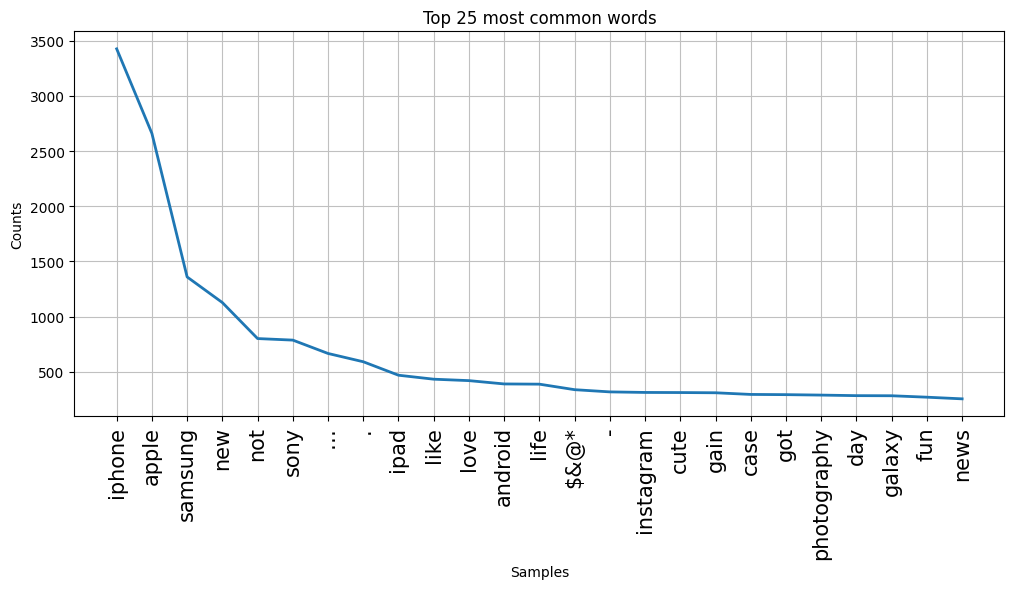

In [410]:

# Write the code for plotting the cleaned tweets
all_words = []
for t in data['tweet_cleaner_with_final_stopwords']:
    all_words.extend(t.split())

print(all_words[:50])

# plotting frequency distribution with stopwords
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


In [411]:
len(all_words)

91401

In [412]:
data.head()

,label,tweet,tweet_cleaner_without_stopwords,tweet_cleaner_with_stopwords,tweet_cleaner_with_final_stopwords
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case ^^ thanks t...,finally transparant silicon case thanks uncle ...,finally transparant silicon case ^^ thanks unc...
2,0,We love this! Would you go? #talk #makememorie...,we love this! would you go? talk makememories ...,love talk makememories unplug relax iphone sma...,love this! go? talk makememories unplug relax ...
3,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home,wired know george way ;) iphone cute daventry ...
4,1,What amazing service! Apple won't even talk to...,what amazing service! apple will not even talk...,amazing service apple talk question unless pay...,amazing service! apple not talk question unles...


In [413]:
len(data['tweet'][5])

65

In [414]:
len(data["tweet_cleaner_without_stopwords"][5])

66

In [415]:
len(data["tweet_cleaner_with_stopwords"][5])

60

In [416]:
len(data["tweet_cleaner_with_final_stopwords"][5])

53

In [417]:
data.shape

(7920, 5)

In [418]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv_features=cv.fit_transform(data['tweet_cleaner_with_final_stopwords'])
cv_features.shape

(7920, 16933)

In [419]:
import pandas as pd 
df=pd.DataFrame(cv_features.todense())

In [420]:
df # this shows that the data frame is sparse matrix

,0,1,2,3,4,5,6,7,8,9,...,16923,16924,16925,16926,16927,16928,16929,16930,16931,16932
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [421]:
# checking non zero elements
import numpy as np 
non_zeroes=np.count_nonzero(df)
non_zeroes

85760

In [422]:
total_elements=data.size # total number of elements
total_elements

39600

In [423]:
# percent of the non-zero elements in the df
non_zeroes/total_elements*100

216.56565656565658

In [424]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cv_features,data['label'],test_size=0.25,stratify=data['label'],random_state=42)

In [425]:
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression(class_weight="balanced",solver="liblinear",penalty="l1",C=0.5)
LR1.fit(x_train,y_train)
print(LR1.score(x_train,y_train))
print(LR1.score(x_test,y_test))

0.8966329966329967
0.8691919191919192


In [426]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [427]:
x=cv_features
y=data['label']

In [428]:
results=cross_val_score(LR1,x,y,cv=kfold,scoring="accuracy")
print(results)
print(np.round((results.mean())*100,2),np.round((results.std())*100,2))

[0.87689394 0.87058081 0.87121212 0.88005051 0.88068182]
87.59 0.43


In [429]:
data['tweet_cleaner_with_final_stopwords'][156]

'hacker wifi password android apps beautiful cute color igers iphoneonly iphone'

In [430]:
data['tweet_cleaner_with_final_stopwords'][186]

'new york baby ;) new york amazing city big apple summer'

In [431]:
data['tweet_cleaner_with_final_stopwords'][5]

'iphone software update fucked big time stupid iphones'

In [432]:
data["label"][156]

0

In [433]:
import joblib

In [434]:
# Save the trained model and vectorizer
joblib.dump(LR1, "sentiment_model.pkl")
joblib.dump(cv, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [435]:
import pickle

In [436]:
# loading our trained model 
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [437]:
def prediction(comment):
    preprocessed_comment = tweet_cleaner_with_final_stopwords(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = cv.transform(comment_list)
    prediction = LR1.predict(comment_vector)[0]
    return prediction


In [438]:
prediction_label = prediction("Got a surprise gift from a friend today. Small gestures like this make life so beautiful! 🎁😊 #FeelingBlessed")

In [439]:
if prediction_label == 0:
    print("positive comment")
else:
    print("negative comment")
    

positive comment
